In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
from sklearn import linear_model, model_selection
from sklearn import tree, ensemble, model_selection, metrics
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
# importing the one-hot file 
variables = pd.read_csv('/Users/weijilim/Downloads/hh_final_one_hot_encoding.csv')
variables

,Unnamed: 0,HOUSEID,VEHOWN,HHFAMINC,WALK,TAXI,BUS,TRAIN,PRICE,WALK2SAVE,BIKE2SAVE,PTRANS,HHRELATD,CNTTDHH,LIF_CYC,URBAN,URBANSIZE,HIGH_EDUC,HOMEOWN,WEBUSE17,WRKCOUNT_ratio,HHSIZE_cleaned,FT_ratio,AVG_WORK_DIST,one_job,flexible_work,DRVRCNTPROP_binned,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2
0,0,30000012,1,10.0,2.0,5.0,4.0,4.0,2.0,2.0,3.0,5.0,2,9,1,1,3,5.0,HOME_OWN,Daily,1,1,1,5-10 miles,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,30000082,1,8.0,NaN,5.0,5.0,5.0,3.0,5.0,5.0,5.0,1,12,4,1,3,5.0,HOME_RENT,Daily,>0.5,>2,0.5,>15 miles,0.5,<0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2,30000130,1,5.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1,4,2,1,5,5.0,HOME_OWN,Daily,1,2,1,>15 miles,1,0.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3,30000380,1,3.0,NaN,4.0,4.0,NaN,1.0,NaN,NaN,NaN,1,18,6,1,1,3.0,HOME_RENT,Daily,<0.5,>2,<0.5,<=5 miles,<0.5,<0.5,>0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,30000434,1,8.0,1.0,5.0,5.0,4.0,NaN,2.0,3.0,3.0,1,6,2,4,6,5.0,HOME_OWN,Daily,1,2,0.5,>15 miles,1,0.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

   counts  percentage
1   15636   91.023402
0    1542    8.976598


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


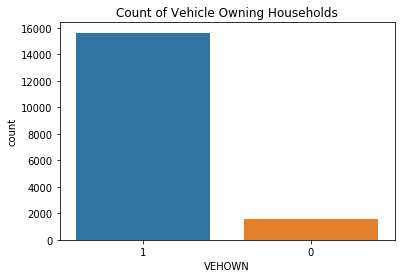

In [3]:
# check proportion
#define function 
import seaborn as sns
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

#define function 
plt.title('Count of Vehicle Owning Households')
cat_col_prop(variables, 'VEHOWN')

In [4]:
prep = variables.drop(columns = ['Unnamed: 0','HHFAMINC','WALK','TAXI','BIKE2SAVE','PTRANS','BUS','TRAIN','WALK2SAVE','HHRELATD','LIF_CYC','URBAN','URBANSIZE','HIGH_EDUC','HOMEOWN','WRKCOUNT_ratio','HHSIZE_cleaned','FT_ratio','WEBUSE17','PRICE','AVG_WORK_DIST','one_job','flexible_work'])
households = pd.read_csv('/Users/weijilim/Downloads/csv/hhpub.csv')
NY_households = households[households['HHSTATE'] == 'NY']
prep

,HOUSEID,VEHOWN,CNTTDHH,DRVRCNTPROP_binned,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2
0,30000012,1,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,30000082,1,12,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,30000130,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,30000380,1,18,>0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,30000434,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17173,40793685,1,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
17174,40793808,1,16,>0.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,

In [5]:
hhsize = NY_households[['HOUSEID','HHSIZE']].copy()

In [6]:
hhtrip = prep[['HOUSEID','CNTTDHH']].copy()
hh_trip = hhtrip.merge(hhsize, on = 'HOUSEID', how = 'left')

In [7]:
hh_trip['avg_trip'] = hh_trip['CNTTDHH']/hh_trip['HHSIZE']

In [8]:
## pd.qcut(hh_trip['avg_trip'],3)

           counts  percentage
2.000000     2221   12.929328
3.000000     1853   10.787053
0.000000     1744   10.152521
4.000000     1738   10.117592
5.000000     1312    7.637676
...           ...         ...
23.000000       1    0.005821
14.500000       1    0.005821
3.285714        1    0.005821
5.375000        1    0.005821
1.625000        1    0.005821

[156 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


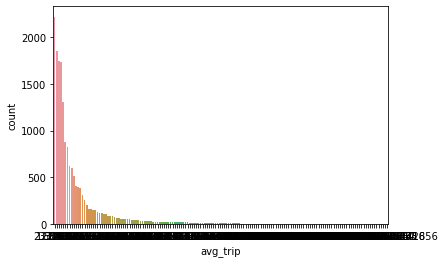

In [9]:
cat_col_prop(hh_trip, 'avg_trip')

             counts  percentage
2 - 5 trips    7691   44.772383
<=2 trips      5961   34.701362
> 5 trips      3526   20.526255


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


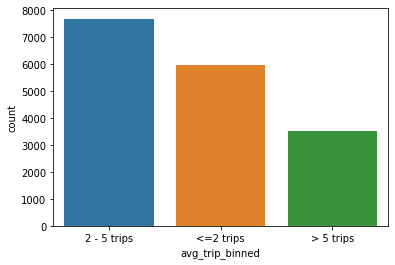

In [10]:
bins = [0, 2, 5, 100]
bins_label = ['<=2 trips','2 - 5 trips','> 5 trips']
hh_trip['avg_trip_binned'] = pd.cut(hh_trip['avg_trip'], bins, labels = bins_label,include_lowest=True)


cat_col_prop(hh_trip,'avg_trip_binned')

In [11]:
hh_trip_final = hh_trip[['HOUSEID','avg_trip_binned','avg_trip']]

In [12]:
prep = prep.merge(hh_trip_final, on ='HOUSEID', how = 'left')

In [13]:
df_one_hot = pd.get_dummies(prep['avg_trip_binned'])

In [14]:
prep_final = pd.concat([prep, df_one_hot], axis = 1)
prep_final = prep_final.drop(columns =['avg_trip_binned','CNTTDHH','DRVRCNTPROP_binned','avg_trip'])
prep_final

,HOUSEID,VEHOWN,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2,<=2 trips,2 - 5 trips,> 5 trips
0,30000012,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,30000082,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,30000130,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,30000380,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,30000434,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17173,40793685,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
17174,40793808,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Model Implementation

In [15]:
np.random.seed(31415)
# shuffle the data 
prep_final = prep_final.reindex(np.random.permutation(prep_final.index)) 

# training variables
x = prep_final.drop(columns = ['HOUSEID','VEHOWN'])


#
# test variables 
y = np.array(prep_final[['VEHOWN']]).astype(int)

y = y.reshape(y.shape[0],)
y.shape
x.shape

(17178, 133)

In [16]:
# split into train and test set
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=np.random.seed(1234))



In [17]:
y_test.shape

(3436,)

In [18]:
x_train

,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2,<=2 trips,2 - 5 trips,> 5 trips
11014,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
12817,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
12590,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
15691,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
15395,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15272,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4880,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

# Models Without Sampling

### Logistic Regression w/o Sampling

In [19]:
# initial model without doing sampling
estimator = linear_model.LogisticRegression(max_iter = 300, random_state=np.random.seed(1234))
estimator.fit(x_train, y_train)

# use the metrics to see - accuracy, recall, precision and F1 score
y_pred = estimator.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred),5))
print('Precision (non-veh)', round(metrics.precision_score(1-y_test, 1-y_pred),5))
print('Recall (non-veh)', round(metrics.recall_score(1-y_test, 1-y_pred),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))



Accuracy Score:  0.97293
AUC 0.89596
Precision (non-veh) 0.89895
Recall (non-veh) 0.80124

The evaluation report is:
Confusion Matrix:
[[ 258   64]
 [  29 3085]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       322
           1       0.98      0.99      0.99      3114

    accuracy                           0.97      3436
   macro avg       0.94      0.90      0.92      3436
weighted avg       0.97      0.97      0.97      3436



### Decision Tree w/o Sampling

In [20]:
# Decision Tree
dt_estimator = tree.DecisionTreeClassifier( random_state=np.random.seed(1234))
dt_estimator.fit(x_train, y_train)
y_predict = dt_estimator.predict(x_test)

# Metrics for DT 
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_predict),5))
print('precision (non-veh)', round(metrics.precision_score(1-y_test, 1-y_predict),5))
print('recall (non-veh)', round(metrics.recall_score(1-y_test, 1-y_predict),5))

# Confusion Matrix for DT

report = f"""Test set
The evaluation report of fully grown tree is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_predict)}
Accuracy: {round(metrics.accuracy_score(y_test, y_predict), 3)}
"""
print(report)

print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_predict)))

Accuracy Score:  0.95955
precision (non-veh) 0.78154
recall (non-veh) 0.78882
Test set
The evaluation report of fully grown tree is:
Confusion Matrix:
[[ 254   68]
 [  71 3043]]
Accuracy: 0.96

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       322
           1       0.98      0.98      0.98      3114

    accuracy                           0.96      3436
   macro avg       0.88      0.88      0.88      3436
weighted avg       0.96      0.96      0.96      3436



In [21]:
# visualise the tree
from sklearn.tree import export_graphviz
import graphviz

In [22]:
x_columns = x.columns.to_list()

In [23]:
dot_data = export_graphviz(
        dt_estimator,
        out_file=None,
        feature_names=x_columns,
        class_names = ['non-car','car'],
        rounded=True,
        filled=True
    )

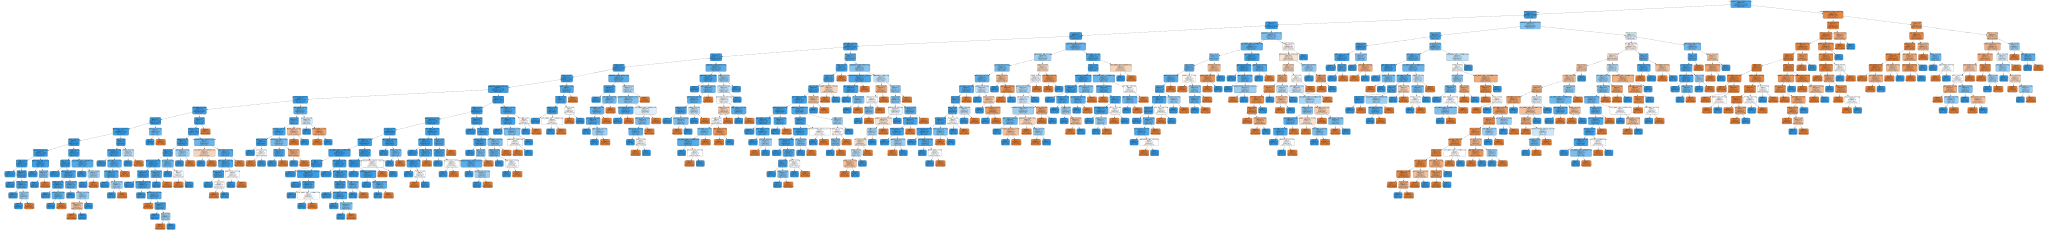

In [24]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [25]:
graph.render("initial_tree")

'initial_tree.png'

## Cross-Fold Validation 

# Models with Sampling Techniques

## Oversampling using imblearn

In [26]:
#pip install imblearn for SMOTE
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
# apply only to train set
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))



Before oversampling:  Counter({1: 12522, 0: 1220})
After oversampling:  Counter({1: 12522, 0: 12522})


In [27]:
# LR with oversampling
estimator_lr = linear_model.LogisticRegression()
estimator_lr.fit(x_train_SMOTE, y_train_SMOTE)

# use the metrics to see - accuracy, recall, precision and F1 score
y_lr_over = estimator_lr.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_lr_over),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_lr_over),5))
print('Recall:',round(metrics.f1_score(y_test, y_lr_over),5))
print('Precision:',round(metrics.precision_score(y_test, y_lr_over),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_lr_over),5))
print('Precision (non-veh)', round(metrics.precision_score(1-y_test, 1-y_lr_over),5))
print('Recall (non-veh)', round(metrics.recall_score(1-y_test, 1-y_lr_over),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_lr_over)}
Accuracy: {round(metrics.accuracy_score(y_test, y_lr_over), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_lr_over)))




Accuracy Score:  0.97322
F1 Score: 0.99101
Recall: 0.98531
Precision: 0.97968
AUC 0.89613
Precision (non-veh) 0.9021
Recall (non-veh) 0.80124

The evaluation report is:
Confusion Matrix:
[[ 258   64]
 [  28 3086]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       322
           1       0.98      0.99      0.99      3114

    accuracy                           0.97      3436
   macro avg       0.94      0.90      0.92      3436
weighted avg       0.97      0.97      0.97      3436



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
dt_smote = tree.DecisionTreeClassifier(random_state=np.random.seed(1234))
dt_smote.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_smote = dt_smote.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred_smote),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_pred_smote),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred_smote),5))
print('Precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_pred_smote),5))
print('Recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_pred_smote),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred_smote)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred_smote), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred_smote)))


Accuracy Score:  0.95547
F1 Score: 0.96821
AUC 0.90025
Precision (non-car) 0.73025
Recall (non-car) 0.8323

The evaluation report is:
Confusion Matrix:
[[ 268   54]
 [  99 3015]]
Accuracy: 0.955

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       322
           1       0.98      0.97      0.98      3114

    accuracy                           0.96      3436
   macro avg       0.86      0.90      0.88      3436
weighted avg       0.96      0.96      0.96      3436



## Undersampling using imblearn

In [29]:
#undersampling 

from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler()

# fit and apply the transform
x_train_under, y_train_under = under.fit_resample(x_train, y_train)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_under))



Before oversampling:  Counter({1: 12522, 0: 1220})
After oversampling:  Counter({0: 1220, 1: 1220})


## Logistic Regression with Undersampling

In [30]:
estimator_lr = linear_model.LogisticRegression(max_iter = 300)
estimator_lr.fit(x_train_under, y_train_under)

# use the metrics to see - accuracy, recall, precision and F1 score
y_lr_under = estimator_lr.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_lr_under),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_lr_under),5))
print('Recall:',round(metrics.f1_score(y_test, y_lr_under),5))
print('Precision:',round(metrics.precision_score(y_test, y_lr_under),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_lr_under),5))
print('Precision (non-veh)', round(metrics.precision_score(1-y_test, 1-y_lr_under),5))
print('Recall (non-veh)', round(metrics.recall_score(1-y_test, 1-y_lr_under),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_lr_under)}
Accuracy: {round(metrics.accuracy_score(y_test, y_lr_under), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_lr_under)))

Accuracy Score:  0.94994
F1 Score: 0.95055
Recall: 0.97177
Precision: 0.99396
AUC 0.94732
Precision (non-veh) 0.66376
Recall (non-veh) 0.9441

The evaluation report is:
Confusion Matrix:
[[ 304   18]
 [ 154 2960]]
Accuracy: 0.95

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.66      0.94      0.78       322
           1       0.99      0.95      0.97      3114

    accuracy                           0.95      3436
   macro avg       0.83      0.95      0.88      3436
weighted avg       0.96      0.95      0.95      3436



## Decision Tree with Undersampling

In [31]:
dt_under = tree.DecisionTreeClassifier(random_state=np.random.seed(1234))
dt_under.fit(x_train_under, y_train_under)

y_pred_under = dt_under.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred_under),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_pred_under),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred_under),5))
print('Precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_pred_under),5))
print('Recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_pred_under),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred_under)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred_under), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred_under)))

Accuracy Score:  0.90803
F1 Score: 0.90591
AUC 0.91724
Precision (non-car) 0.50507
Recall (non-car) 0.92857

The evaluation report is:
Confusion Matrix:
[[ 299   23]
 [ 293 2821]]
Accuracy: 0.908

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.51      0.93      0.65       322
           1       0.99      0.91      0.95      3114

    accuracy                           0.91      3436
   macro avg       0.75      0.92      0.80      3436
weighted avg       0.95      0.91      0.92      3436



# Ensemble Learning

## Random Forest without Sampling

In [32]:
# Random Forest Model
rf_car = ensemble.RandomForestClassifier(max_depth = 20, random_state=np.random.seed(1234), min_samples_split = 10, min_samples_leaf = 3, n_estimators = 100,class_weight='balanced')
rf_car.fit(x_train, y_train)
y_rf_pred = rf_car.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred),5))
print('precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_rf_pred),5))
print('recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_rf_pred),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred)))

Accuracy Score:  0.97177
F1 Score: 0.97945
AUC 0.93848
precision (non-car) 0.8187
recall (non-car) 0.89752

The evaluation report is:
Confusion Matrix:
[[ 289   33]
 [  64 3050]]
Accuracy: 0.972

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       322
           1       0.99      0.98      0.98      3114

    accuracy                           0.97      3436
   macro avg       0.90      0.94      0.92      3436
weighted avg       0.97      0.97      0.97      3436



## Random Forest with Oversampling

In [33]:
rf_smote = ensemble.RandomForestClassifier(max_depth = 20, random_state=np.random.seed(1234), min_samples_split = 10, min_samples_leaf = 3, n_estimators = 100)
rf_smote.fit(x_train_SMOTE, y_train_SMOTE)
y_rf_pred_over = rf_car.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred_over),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred_over),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred_over),5))
print('precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_rf_pred_over),5))
print('recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_rf_pred_over),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred_over)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred_over), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred_over)))

Accuracy Score:  0.97177
F1 Score: 0.97945
AUC 0.93848
precision (non-car) 0.8187
recall (non-car) 0.89752

The evaluation report is:
Confusion Matrix:
[[ 289   33]
 [  64 3050]]
Accuracy: 0.972

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       322
           1       0.99      0.98      0.98      3114

    accuracy                           0.97      3436
   macro avg       0.90      0.94      0.92      3436
weighted avg       0.97      0.97      0.97      3436



## Random Forest with Undersampling

In [34]:
rf_under = ensemble.RandomForestClassifier(max_depth = 20, random_state=np.random.seed(1234), min_samples_split = 10, min_samples_leaf = 3, n_estimators = 100)
rf_under.fit(x_train_under, y_train_under)
y_rf_pred_under = rf_under.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred_under),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred_under),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred_under),5))
print('precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_rf_pred_under),5))
print('recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_rf_pred_under),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred_under)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred_under), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred_under)))

Accuracy Score:  0.93685
F1 Score: 0.93481
AUC 0.94567
precision (non-car) 0.60274
recall (non-car) 0.95652

The evaluation report is:
Confusion Matrix:
[[ 308   14]
 [ 203 2911]]
Accuracy: 0.937

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.60      0.96      0.74       322
           1       1.00      0.93      0.96      3114

    accuracy                           0.94      3436
   macro avg       0.80      0.95      0.85      3436
weighted avg       0.96      0.94      0.94      3436



## Gradient Boosting without Sampling

In [35]:
# Gradient Boost Model
gb_car = ensemble.GradientBoostingClassifier(n_estimators = 10, random_state=np.random.seed(1234))
gb_car.fit(x_train, y_train)
y_gb_car = gb_car.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_gb_car),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_gb_car),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_gb_car),5))
print('precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_gb_car),5))
print('recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_gb_car),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car)))

Accuracy Score:  0.96595
F1 Score: 0.99711
AUC 0.83085
precision (non-car) 0.95964
recall (non-car) 0.6646

The evaluation report is:
Confusion Matrix:
[[ 214  108]
 [   9 3105]]
Accuracy: 0.966

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.96      0.66      0.79       322
           1       0.97      1.00      0.98      3114

    accuracy                           0.97      3436
   macro avg       0.96      0.83      0.88      3436
weighted avg       0.97      0.97      0.96      3436



## Gradient Boosting with Oversampling

In [36]:
gb_car_smote = ensemble.GradientBoostingClassifier(n_estimators = 10, random_state=np.random.seed(1234))
gb_car_smote.fit(x_train_SMOTE, y_train_SMOTE)
y_gb_car_over = gb_car_smote.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_gb_car_over),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_gb_car_over),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_gb_car_over),5))
print('precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_gb_car_over),5))
print('recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_gb_car_over),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car_over)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car_over), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car_over)))

Accuracy Score:  0.92026
F1 Score: 0.92132
AUC 0.91563
precision (non-car) 0.54461
recall (non-car) 0.90994

The evaluation report is:
Confusion Matrix:
[[ 293   29]
 [ 245 2869]]
Accuracy: 0.92

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.54      0.91      0.68       322
           1       0.99      0.92      0.95      3114

    accuracy                           0.92      3436
   macro avg       0.77      0.92      0.82      3436
weighted avg       0.95      0.92      0.93      3436



## Gradient Boosting with Undersampling

In [37]:
gb_car_under = ensemble.GradientBoostingClassifier(n_estimators = 10, random_state=np.random.seed(1234))
gb_car_under.fit(x_train_under, y_train_under)
y_gb_car_under = gb_car_under.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_gb_car_under),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_gb_car_under),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_gb_car_under),5))
print('precision (non-car)', round(metrics.precision_score(1-y_test, 1-y_gb_car_under),5))
print('recall (non-car)', round(metrics.recall_score(1-y_test, 1-y_gb_car_under),5))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car_under)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car_under), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car_under)))

Accuracy Score:  0.93714
F1 Score: 0.93995
AUC 0.92494
precision (non-car) 0.61042
recall (non-car) 0.90994

The evaluation report is:
Confusion Matrix:
[[ 293   29]
 [ 187 2927]]
Accuracy: 0.937

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.61      0.91      0.73       322
           1       0.99      0.94      0.96      3114

    accuracy                           0.94      3436
   macro avg       0.80      0.92      0.85      3436
weighted avg       0.95      0.94      0.94      3436



## AdaBoost without Sampling

In [38]:
# Adaboost
ada_car = ensemble.AdaBoostClassifier(random_state=np.random.seed(1234), learning_rate = 0.3, n_estimators=300)
ada_car.fit(x_train, y_train)
y_ada = ada_car.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_ada),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_ada),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_ada),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_ada),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_ada),5))

m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_ada)}
Accuracy: {round(metrics.accuracy_score(y_test, y_ada), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_ada)))

Accuracy Score:  0.97148
F1 Score: 0.99037
AUC 0.88959
precision on non-car 0.89437
recall on non-car 0.78882

The evaluation report is:
Confusion Matrix:
[[ 254   68]
 [  30 3084]]
Accuracy: 0.971

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       322
           1       0.98      0.99      0.98      3114

    accuracy                           0.97      3436
   macro avg       0.94      0.89      0.91      3436
weighted avg       0.97      0.97      0.97      3436



## AdaBoost with Oversampling

In [39]:
# Adaboost
ada_car_smote = ensemble.AdaBoostClassifier(random_state=2021, learning_rate = 0.3, n_estimators=300)
ada_car_smote.fit(x_train_SMOTE, y_train_SMOTE)
y_ada_over = ada_car_smote.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_ada_over),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_ada_over),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_ada_over),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_ada_over),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_ada_over),5))

m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_ada_over)}
Accuracy: {round(metrics.accuracy_score(y_test, y_ada_over), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_ada_over)))

Accuracy Score:  0.97177
F1 Score: 0.98587
AUC 0.91064
precision on non-car 0.85942
recall on non-car 0.8354

The evaluation report is:
Confusion Matrix:
[[ 269   53]
 [  44 3070]]
Accuracy: 0.972

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       322
           1       0.98      0.99      0.98      3114

    accuracy                           0.97      3436
   macro avg       0.92      0.91      0.92      3436
weighted avg       0.97      0.97      0.97      3436



## AdaBoost with Undersampling

In [40]:
# Adaboost
ada_car_under= ensemble.AdaBoostClassifier(random_state=2021, learning_rate = 0.3, n_estimators=300)
ada_car_under.fit(x_train_under, y_train_under)
y_ada_under = ada_car_under.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_ada_under),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_ada_under),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_ada_under),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_ada_under),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_ada_under),5))

m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_ada_under)}
Accuracy: {round(metrics.accuracy_score(y_test, y_ada_under), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_ada_under)))

Accuracy Score:  0.9514
F1 Score: 0.95279
AUC 0.94534
precision on non-car 0.67261
recall on non-car 0.93789

The evaluation report is:
Confusion Matrix:
[[ 302   20]
 [ 147 2967]]
Accuracy: 0.951

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78       322
           1       0.99      0.95      0.97      3114

    accuracy                           0.95      3436
   macro avg       0.83      0.95      0.88      3436
weighted avg       0.96      0.95      0.95      3436



## CatBoost without Sampling

In [41]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(verbose = 0,random_state=np.random.seed(1234))
cat_boost.fit(x_train, y_train)
    
cat_y = cat_boost.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, cat_y),5))
print('F1 Score:',round(metrics.recall_score(y_test, cat_y),5))
print('AUC',round(metrics.roc_auc_score(y_test, cat_y),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-cat_y),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-cat_y),5))
m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, cat_y)}
Accuracy: {round(metrics.accuracy_score(y_test, cat_y), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, cat_y)))

Accuracy Score:  0.97643
F1 Score: 0.99101
AUC 0.91321
precision on non-car 0.90572
recall on non-car 0.8354

The evaluation report is:
Confusion Matrix:
[[ 269   53]
 [  28 3086]]
Accuracy: 0.976

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       322
           1       0.98      0.99      0.99      3114

    accuracy                           0.98      3436
   macro avg       0.94      0.91      0.93      3436
weighted avg       0.98      0.98      0.98      3436



## CatBoost with Oversampling

In [42]:
cat_over = CatBoostClassifier(verbose = 0,random_state=np.random.seed(1234) )
cat_over.fit(x_train_SMOTE, y_train_SMOTE)
    
cat_y_over = cat_over.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, cat_y_over),5))
print('F1 Score:',round(metrics.recall_score(y_test, cat_y_over),5))
print('AUC',round(metrics.roc_auc_score(y_test, cat_y_over),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-cat_y_over),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-cat_y_over),5))
m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, cat_y_over)}
Accuracy: {round(metrics.accuracy_score(y_test, cat_y_over), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, cat_y_over)))

Accuracy Score:  0.97381
F1 Score: 0.98908
AUC 0.90758
precision on non-car 0.88667
recall on non-car 0.82609

The evaluation report is:
Confusion Matrix:
[[ 266   56]
 [  34 3080]]
Accuracy: 0.974

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       322
           1       0.98      0.99      0.99      3114

    accuracy                           0.97      3436
   macro avg       0.93      0.91      0.92      3436
weighted avg       0.97      0.97      0.97      3436



## CatBoost with Undersampling

In [43]:
cat_under = CatBoostClassifier(verbose = 0,random_state=np.random.seed(1234) )
cat_under.fit(x_train_under, y_train_under)
    
cat_y_under = cat_under.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, cat_y_under),5))
print('F1 Score:',round(metrics.recall_score(y_test, cat_y_under),5))
print('AUC',round(metrics.roc_auc_score(y_test, cat_y_under),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-cat_y_under),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-cat_y_under),5))
m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, cat_y_under)}
Accuracy: {round(metrics.accuracy_score(y_test, cat_y_under), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, cat_y_under)))

Accuracy Score:  0.94965
F1 Score: 0.94926
AUC 0.95134
precision on non-car 0.66022
recall on non-car 0.95342

The evaluation report is:
Confusion Matrix:
[[ 307   15]
 [ 158 2956]]
Accuracy: 0.95

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78       322
           1       0.99      0.95      0.97      3114

    accuracy                           0.95      3436
   macro avg       0.83      0.95      0.88      3436
weighted avg       0.96      0.95      0.95      3436



# Hyperparameter Tuning of Models

In [44]:
# split the train data further to validation and test data
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(x_train, y_train, test_size=0.2, random_state=np.random.seed(1234))
X_train_over, X_val_over, Y_train_over, Y_val_over = model_selection.train_test_split(x_train_SMOTE, y_train_SMOTE, test_size=0.2, random_state=np.random.seed(1234))
X_train_under, X_val_under, Y_train_under, Y_val_under = model_selection.train_test_split(x_train_under, y_train_under, test_size=0.2, random_state=np.random.seed(1234))

## Tuning of RF Model

In [45]:
## Tuning of RF Model
# Orignal data
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [10,20,30,40,50,60],
              'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [3, 5, 11, 25],
             }
rf_tune = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, n_iter = 100, verbose = 2, n_jobs = -1, random_state=np.random.seed(1234))
rf_tune.fit(X_train, Y_train)
y_rf_tune = rf_tune.predict(x_test)
print('best score:', rf_tune.best_score_)
print('best parameters: ', rf_tune.best_params_)

print('AUC',round(metrics.roc_auc_score(y_test, y_rf_tune),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_rf_tune),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_rf_tune),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_rf_tune)}
"""
print(m_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.970344655793166
best parameters:  {'n_estimators': 60, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 15}
AUC 0.87101
precision on non-car 0.92337
recall on non-car 0.74845

The evaluation report is:
Confusion Matrix (Test):
[[ 241   81]
 [  20 3094]]



In [46]:
## Tuning of RF Model
# Oversampled Data
rf_tune_over = RandomizedSearchCV(RandomForestClassifier(random_state=np.random.seed(1234)), param_distributions = parameters, n_iter = 100, verbose = 2, scoring = 'precision', n_jobs = -1,random_state=np.random.seed(1234))
rf_tune_over.fit(X_train_over, Y_train_over)
y_rft_over = rf_tune_over.predict(x_test)
print('best score:', rf_tune_over.best_score_)
print('best parameters: ', rf_tune_over.best_params_)

print('AUC',round(metrics.roc_auc_score(y_test, y_rft_over),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_rft_over),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_rft_over),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_rft_over)}
"""
print(m_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9888897338240408
best parameters:  {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 25}
AUC 0.92654
precision on non-car 0.82164
recall on non-car 0.87267

The evaluation report is:
Confusion Matrix (Test):
[[ 281   41]
 [  61 3053]]



In [47]:
## Tuning of RF Model
# Undersampled Data
rf_tune_under = RandomizedSearchCV(RandomForestClassifier(random_state=np.random.seed(1234)), param_distributions = parameters, n_iter = 100, verbose = 2, scoring = 'recall', n_jobs = -1,random_state=np.random.seed(1234))
rf_tune_under.fit(X_train_under, Y_train_under)
y_rft_under = rf_tune_under.predict(x_test)
print('best score:', rf_tune_under.best_score_)
print('best parameters: ', rf_tune_under.best_params_)

print('AUC',round(metrics.roc_auc_score(y_test, y_rft_under),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_rft_under),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_rft_under),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_rft_under)}
"""
print(m_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9285366225064717
best parameters:  {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 25, 'max_features': 'auto', 'max_depth': 15}
AUC 0.92329
precision on non-car 0.53097
recall on non-car 0.93168

The evaluation report is:
Confusion Matrix (Test):
[[ 300   22]
 [ 265 2849]]



## Tuning of Gradient Boosting Model

In [48]:
## Tuning of Gradient Boosting Model
# Original Data
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [20,50,100],
              "learning_rate"    : [0.1, 0.3,0.5],
              "max_depth"        : [10, 20,30],
              "min_samples_split": [10,20,30],
              "min_samples_leaf" : [5,7,11],
              "max_leaf_nodes": [3,5,7,10]
             }
grad_tune = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_grid, n_iter = 100, scoring = 'precision', verbose = 10, n_jobs = -1,random_state=np.random.seed(1234))
grad_tune.fit(X_train,Y_train)
y_grad = grad_tune.predict(x_test)
print('best score:', grad_tune.best_score_)
print('best parameters: ', grad_tune.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_grad),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_grad),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_grad),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_grad)}
"""
print(m_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9817256664145841
best parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_leaf_nodes': 5, 'max_depth': 20, 'learning_rate': 0.3}
AUC 0.90683
precision on non-car 0.90136
recall on non-car 0.82298

The evaluation report is:
Confusion Matrix (Test):
[[ 265   57]
 [  29 3085]]



In [49]:
## Tuning of Gradient Boosting Model
# Oversampled Data
grad_tune_over = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_grid, n_iter = 100, scoring = 'precision', verbose = 10, n_jobs = -1,random_state=np.random.seed(1234))
grad_tune_over.fit(X_train_over,Y_train_over)
y_gover = grad_tune_over.predict(x_test)
print('best score:', grad_tune_over.best_score_)
print('best parameters: ', grad_tune_over.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_gover),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_gover),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_gover),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_gover)}
"""
print(m_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9858013939130841
best parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 10, 'max_depth': 10, 'learning_rate': 0.3}
AUC 0.91963
precision on non-car 0.8567
recall on non-car 0.85404

The evaluation report is:
Confusion Matrix (Test):
[[ 275   47]
 [  46 3068]]



In [50]:
## Tuning of Gradient Boosting Model
# Undersampled Data
grad_tune_under = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_grid, n_iter = 100, scoring = 'precision', verbose = 10, n_jobs = -1,random_state=np.random.seed(1234))
grad_tune_under.fit(X_train_under,Y_train_under)
y_gunder = grad_tune_under.predict(x_test)
print('best score:', grad_tune_under.best_score_)
print('best parameters: ', grad_tune_under.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_gunder),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_gunder),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_gunder),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_gunder)}
"""
print(m_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9393425091446816
best parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_leaf_nodes': 10, 'max_depth': 30, 'learning_rate': 0.5}
AUC 0.94545
precision on non-car 0.62322
recall on non-car 0.95031

The evaluation report is:
Confusion Matrix (Test):
[[ 306   16]
 [ 185 2929]]



## Tuning of AdaBoost Model

In [51]:
## Tuning of AdaBoost Model
# Original Data
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [50,100],
              "learning_rate" : [0.01,0.05, 0.1, 0.3],
             }
ada_reg = RandomizedSearchCV(AdaBoostClassifier(), param_distributions = param_grid, n_iter = 100,scoring = 'precision', verbose = 2, n_jobs = -1,random_state=np.random.seed(1234))
ada_reg.fit(X_train, Y_train)
y_ad = ada_reg.predict(x_test)
print('best score:', ada_reg.best_score_)
print('best parameters: ', ada_reg.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_ad),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_ad),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_ad),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_ad)}
"""
print(m_report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


best score: 0.9759147864173418
best parameters:  {'n_estimators': 100, 'learning_rate': 0.3}
AUC 0.87878
precision on non-car 0.92481
recall on non-car 0.76398

The evaluation report is:
Confusion Matrix (Test):
[[ 246   76]
 [  20 3094]]



In [52]:
## Tuning of AdaBoost Model
# Oversampled Data
from sklearn.ensemble import AdaBoostClassifier
ada_over = RandomizedSearchCV(AdaBoostClassifier(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1,random_state=np.random.seed(1234))
ada_over.fit(X_train_over, Y_train_over)
y_adover = ada_over.predict(x_test)
print('best score:', ada_over.best_score_)
print('best parameters: ', ada_over.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_adover),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_adover),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_adover),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_adover)}
"""
print(m_report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


best score: 0.9783878213127029
best parameters:  {'n_estimators': 100, 'learning_rate': 0.3}
AUC 0.92965
precision on non-car 0.82267
recall on non-car 0.87888

The evaluation report is:
Confusion Matrix (Test):
[[ 283   39]
 [  61 3053]]



In [53]:
## Tuning of AdaBoost Model
# Undersampled Data
from sklearn.ensemble import AdaBoostClassifier
ada_under = RandomizedSearchCV(AdaBoostClassifier(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1,random_state=np.random.seed(1234))
ada_under.fit(X_train_under, Y_train_under)
y_adunder = ada_under.predict(x_test)
print('best score:', ada_under.best_score_)
print('best parameters: ', ada_under.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_adunder),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_adunder),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_adunder),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_adunder)}
"""
print(m_report)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


best score: 0.9349360613810742
best parameters:  {'n_estimators': 100, 'learning_rate': 0.3}
AUC 0.94775
precision on non-car 0.65451
recall on non-car 0.9472

The evaluation report is:
Confusion Matrix (Test):
[[ 305   17]
 [ 161 2953]]



## Tuning of CatBoost Model

In [54]:
## Tuning of CatBoost Model
# Original Data
param_grid = {'n_estimators': [100,150,200],
              "learning_rate"    : [0.1, 0.3,0.5,0.65,0.7],
              "max_depth"        : [5,10,20]
             }

cat_tune = RandomizedSearchCV(CatBoostClassifier(verbose = 0), param_distributions = param_grid, n_iter = 100, verbose = 10, n_jobs = -1,random_state=np.random.seed(1234))
cat_tune.fit(X_train,Y_train)
y_cat = cat_tune.predict(x_test)
print('best score:', cat_tune.best_score_)
print('best parameters: ', cat_tune.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_cat),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_cat),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_cat),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_cat)}
"""
print(m_report)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.97261904 0.97270982 0.97234606 0.97170937 0.97134548 0.97125445
        nan        nan        nan 0.97052697 0.96925333 0.96879866
 0.97034486 0.97034486 0.97034486        nan        nan        nan
 0.97161862 0.97143685 0.97089098 0.97043577 0.97043577 0.97043577
        nan        nan        nan 0.96870771 0.96925354 0.96934445
 0.97070866 0.97061771 0.97070866        nan        nan        nan
 0.97107296 0.97070895 0.97161862 0.97107238 0.97116338 0.97098147
        nan        nan        nan]
  category=UserWarning


best score: 0.9727098221914915
best parameters:  {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}
AUC 0.9025
precision on non-car 0.90657
recall on non-car 0.81366

The evaluation report is:
Confusion Matrix (Test):
[[ 262   60]
 [  27 3087]]



In [55]:
## Tuning of CatBoost Model
# Oversampled Data
cat_tune_over = RandomizedSearchCV(CatBoostClassifier(verbose = 0), param_distributions = param_grid, n_iter = 100, verbose = 10, n_jobs = -1,random_state=np.random.seed(1234))
cat_tune_over.fit(X_train_over,Y_train_over)
y_catover = cat_tune_over.predict(x_test)
print('best score:', cat_tune_over.best_score_)
print('best parameters: ', cat_tune_over.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_catover),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_catover),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_catover),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_catover)}
"""
print(m_report)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.98427751 0.98512603 0.98552533 0.98537559 0.98557524 0.98612428
        nan        nan        nan 0.98527577 0.98492638 0.98447716
 0.98552533 0.98587472 0.98567507        nan        nan        nan
 0.98467682 0.98432743 0.98477664 0.98532568 0.98522585 0.98522585
        nan        nan        na

best score: 0.9861242825056152
best parameters:  {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
AUC 0.91867
precision on non-car 0.84098
recall on non-car 0.85404

The evaluation report is:
Confusion Matrix (Test):
[[ 275   47]
 [  52 3062]]



In [56]:
## Tuning of CatBoost Model
# Undersampled Data
cat_tune_under = RandomizedSearchCV(CatBoostClassifier(verbose = 0), param_distributions = param_grid, n_iter = 100, scoring = 'precision', verbose = 10, n_jobs = -1,random_state=np.random.seed(1234))
cat_tune_under.fit(X_train_under,Y_train_under)
y_catunder = cat_tune_under.predict(x_test)
print('best score:', cat_tune_under.best_score_)
print('best parameters: ', cat_tune_under.best_params_)
print('AUC',round(metrics.roc_auc_score(y_test, y_catunder),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-y_catunder),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-y_catunder),5))

m_report = f"""
The evaluation report is:
Confusion Matrix (Test):
{metrics.confusion_matrix(y_test, y_catunder)}
"""
print(m_report)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.93540382 0.93876506 0.93866285 0.93110631 0.93276192 0.93088972
        nan        nan        nan 0.93691974 0.93808982 0.93322179
 0.9339228  0.93213436 0.93303655        nan        nan        nan
 0.93599812 0.93945498 0.93858815 0.9349617  0.93496417 0.93595919
        nan        nan        nan 0.94044445 0.94242894 0.9435494
 0.92735657 0.92734624 0.92823589        nan        nan        nan
 0.93936824 0.93740768 0.9383082  0.92531972 0.9263282  0.92531972
        nan        nan        nan]
  category=UserWarning


best score: 0.9435493987623442
best parameters:  {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.65}
AUC 0.95316
precision on non-car 0.65053
recall on non-car 0.95963

The evaluation report is:
Confusion Matrix (Test):
[[ 309   13]
 [ 166 2948]]



# Model Explainability

In [57]:
# Feature Importance for Random Forest Tuned
x = rf_car.feature_importances_
x_idx = np.where(x != 0)[0]
rf_features = pd.DataFrame(x_train.columns[x_idx], columns = ['Car Variables'])
x_values = pd.DataFrame(rf_car.feature_importances_[x_idx], columns = ['Feature Importance'])
car_importance = pd.concat([rf_features.reset_index(drop=True), x_values], axis=1)
car_importance.nlargest(10,['Feature Importance'])

,Car Variables,Feature Importance
101,DRVRCNTPROP_binned_0,0.151085
65,HOMEOWN_HOME_OWN,0.095204
103,DRVRCNTPROP_binned_1,0.090506
66,HOMEOWN_HOME_RENT,0.076366
28,BUS_5,0.050542
12,WALK_1.0,0.032856
22,TAXI_5,0.030202
124,HHRELATD_1,0.030086
54,PTRANS_1.0,0.025097
20,TAXI_3,0.024711


In [58]:
cat_over = CatBoostClassifier(verbose = 0,random_state=np.random.seed(1234),n_estimators= 200, max_depth = 5, learning_rate = 0.65 )
cat_over.fit(x_train_SMOTE, y_train_SMOTE)
    
cat_y_over = cat_over.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, cat_y_over),5))
print('F1 Score:',round(metrics.recall_score(y_test, cat_y_over),5))
print('AUC',round(metrics.roc_auc_score(y_test, cat_y_over),5))
print('precision on non-car', round(metrics.precision_score(1-y_test, 1-cat_y_over),5))
print('recall on non-car', round(metrics.recall_score(1-y_test, 1-cat_y_over),5))
m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, cat_y_over)}
Accuracy: {round(metrics.accuracy_score(y_test, cat_y_over), 3)}
"""
print(m_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, cat_y_over)))

Accuracy Score:  0.97322
F1 Score: 0.98876
AUC 0.90587
precision on non-car 0.88333
recall on non-car 0.82298

The evaluation report is:
Confusion Matrix:
[[ 265   57]
 [  35 3079]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       322
           1       0.98      0.99      0.99      3114

    accuracy                           0.97      3436
   macro avg       0.93      0.91      0.92      3436
weighted avg       0.97      0.97      0.97      3436



In [59]:
# Feature Importance for Random Forest Tuned
x = cat_over.feature_importances_
x_idx = np.where(x != 0)[0]
cat_features = pd.DataFrame(x_train.columns[x_idx], columns = ['Car Variables'])
x_values = pd.DataFrame(cat_over.feature_importances_[x_idx], columns = ['Feature Importance'])
car_importance = pd.concat([rf_features.reset_index(drop=True), x_values], axis=1)
car_importance.nlargest(10,['Feature Importance'])

,Car Variables,Feature Importance
96,flexible_work_0,17.734534
121,LIF_CYC_8,6.087780
65,HOMEOWN_HOME_OWN,5.366636
120,LIF_CYC_7,5.243001
122,LIF_CYC_9,4.857603
22,TAXI_5,3.991206
28,BUS_5,3.963039
21,TAXI_4,2.740757
98,flexible_work_1,2.727166
29,BUS_NA,2.038533


In [60]:
#pip install shap

In [61]:
import shap

In [62]:
shap_values = shap.TreeExplainer(rf_car).shap_values(x_train)
shap.summary_plot(shap_values[0], x_train, max_display = 10) # for non-vehicle

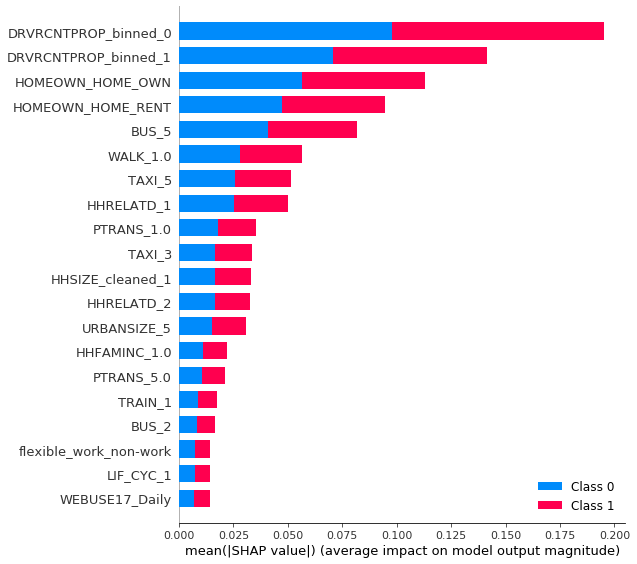

In [63]:
shap.summary_plot(shap_values, x_train)

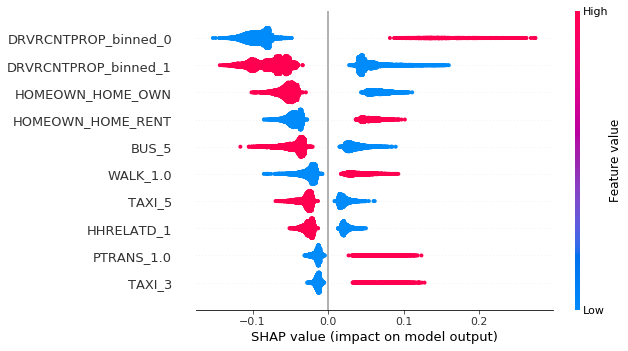